## integrating scRNA-seq and ADT counts with VIMCCA
This tutorial shows loading, preprocessing, VIMCCA joint analyse of multimodal dataset.

## import packages
Here, we’ll import scbean along with other popular packages.

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import scanpy as sc
from scbean.model import vimcca

# Command for Jupyter Notebooks only
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

Using TensorFlow backend.


## loading dataset
This use the CITE-seq dataset from [(Stuart*, Butler* et al, Cell 2019)](https://www.cell.com/cell/fulltext/S0092-8674(19)30559-8), which consists of 30,672 scRNA-seq profiles measured alongside a panel of 25 antibodies from bone marrow. The object contains two assays, RNA and antibody-derived tags (ADT).

In [2]:
base_path = '/Users/wangyuwei/data/'
file_rna = base_path + 'bmcite_rna.h5ad'
file_atac = base_path + 'bmcite_adt.h5ad'

adata_rna = sc.read_h5ad(file_rna)
adata_adt = sc.read_h5ad(file_atac)

## Processing with scanpy
Here, we filter and normalize scRNA-seq data, but only normalize adt data.

In [3]:
sc.pp.filter_genes(adata_rna, min_cells=10)
sc.pp.log1p(adata_rna)
sc.pp.log1p(adata_adt)
sc.pp.scale(adata_rna)
sc.pp.scale(adata_adt)

## Joint analyse using VIMCCA
The returned z represents the complementary low-dimensional features of the two modalities learned by VIMCCA, which can be used for downstream analysis.

In [4]:
z = vimcca.fit_integration(
    adata_rna,
    adata_adt,
    sparse_x=False,
    sparse_y=False,
    hidden_layers=[128, 64, 16, 8],
    epochs=50,
    weight=5
)

Model: "VIMCCA_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_x (InputLayer)           [(None, 16313)]      0                                            
__________________________________________________________________________________________________
encoder_z (Functional)          [(None, 8), (None, 8 2098384     inputs_x[0][0]                   
                                                                 inputs_x[0][0]                   
__________________________________________________________________________________________________
inputs_y (InputLayer)           [(None, 25)]         0                                            
__________________________________________________________________________________________________
decoder_x (Functional)          (None, 16313)        2114553     encoder_z[0][2]         

240/240 [==============================] - 22s 77ms/step - loss: 8406.8715
Epoch 2/50
240/240 [==============================] - 18s 75ms/step - loss: 8099.0491
Epoch 3/50
240/240 [==============================] - 22s 90ms/step - loss: 8036.7829
Epoch 4/50
240/240 [==============================] - 20s 81ms/step - loss: 8031.6400
Epoch 5/50
240/240 [==============================] - 19s 78ms/step - loss: 8022.5068
Epoch 6/50
240/240 [==============================] - 20s 83ms/step - loss: 8004.6630
Epoch 7/50
240/240 [==============================] - 18s 76ms/step - loss: 7967.5135
Epoch 8/50
240/240 [==============================] - 18s 74ms/step - loss: 7975.9237
Epoch 9/50
240/240 [==============================] - 18s 75ms/step - loss: 7967.6382
Epoch 10/50
240/240 [==============================] - 23s 95ms/step - loss: 7963.6224
Epoch 11/50
240/240 [==============================] - 22s 92ms/step - loss: 7977.2625
Epoch 12/50
240/240 [==============================] - 20s 85ms

## Visualization

In [5]:
adata_rna.obsm['X_vimcca'] = z
sc.pp.neighbors(adata_rna, use_rep='X_vimcca')
sc.tl.leiden(adata_rna, resolution=3)
sc.tl.umap(adata_rna)

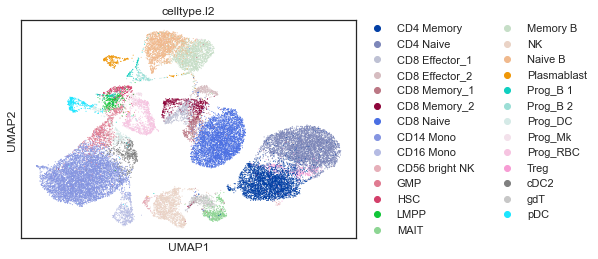

In [6]:
sc.pl.umap(adata_rna, color='celltype.l2')